In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
Path = "https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/iris.csv"

In [3]:
# if You Want to read the Data we use Pandas 
Data = pd.read_csv(Path)

In [72]:
Data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
Data.col

In [5]:
Data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
Data.isna().all()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

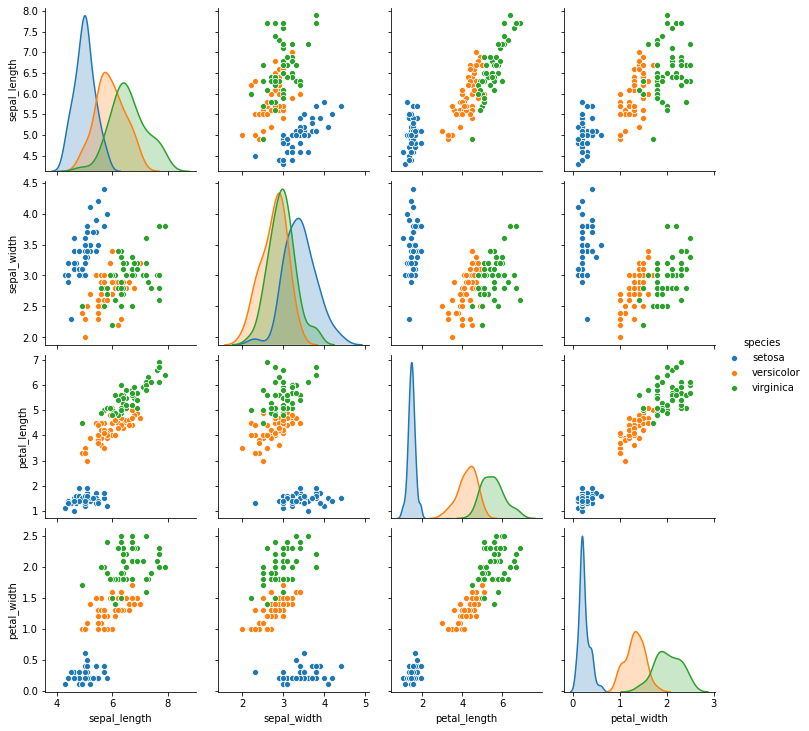

In [10]:
sns.pairplot(Data,hue='species')

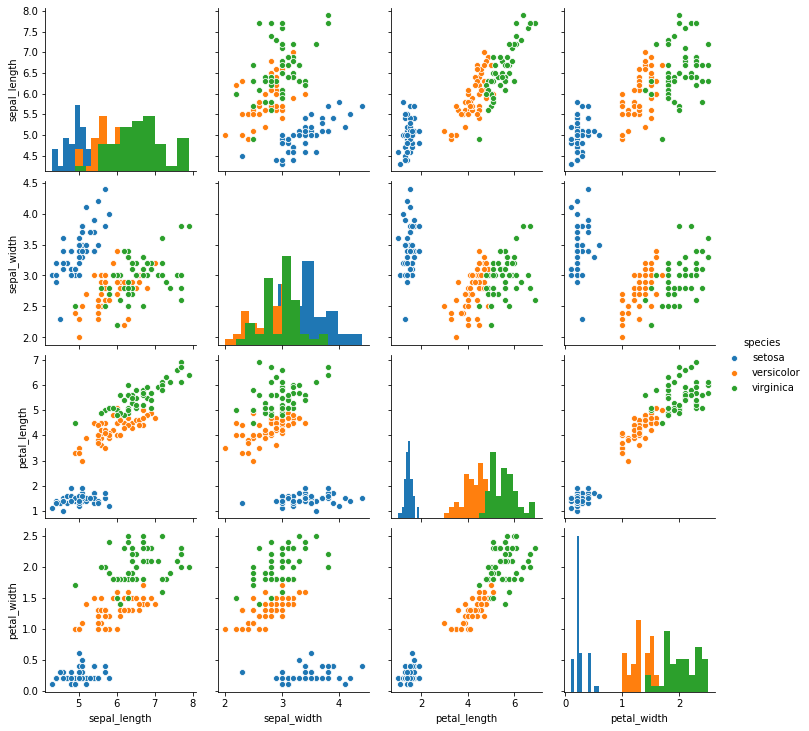

In [11]:
sns.pairplot(Data, hue="species", diag_kind="hist")

In [13]:
# Check for missing values
Data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
# Species distribution
print(Data.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


Hear We nead to Understand how Data is Distributed 
* Understand each attribute
* Understand relationship between each

<Figure size 1152x648 with 0 Axes>

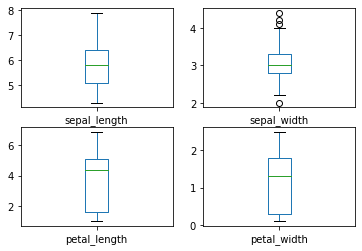

In [16]:
Data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

<AxesSubplot:>

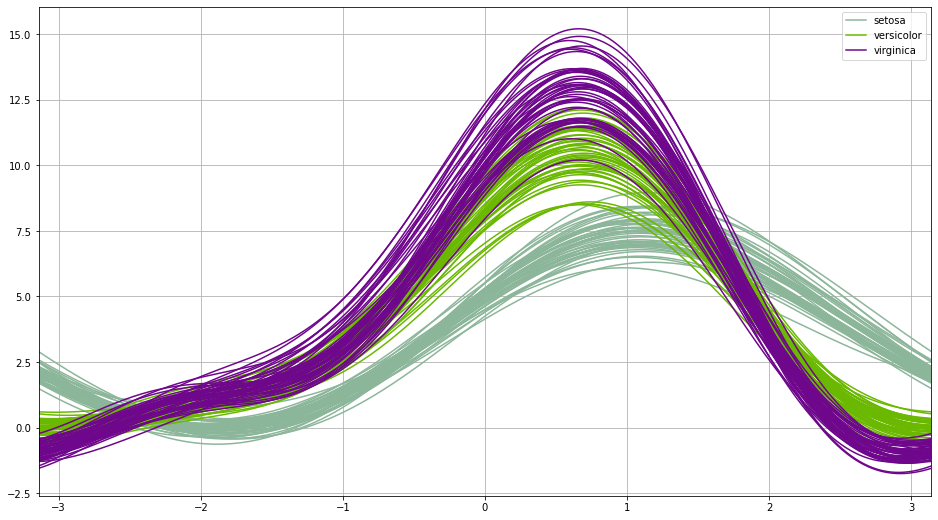

In [20]:
from pandas.plotting import andrews_curves,parallel_coordinates
plt.figure(figsize=(16,9))
andrews_curves(Data, "species") 

<AxesSubplot:>

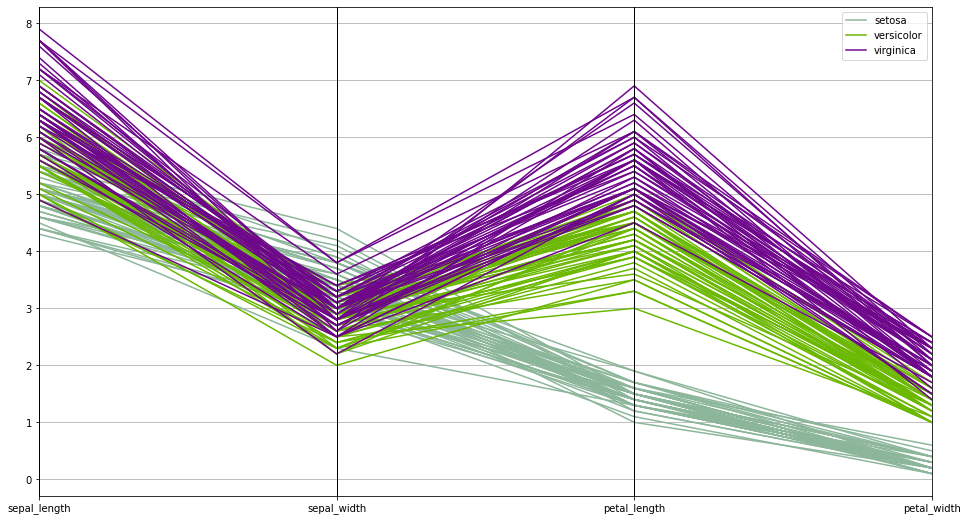

In [21]:
plt.figure(figsize=(16,9))
parallel_coordinates(Data, "species") 

In [22]:
# Split the Feature and Target
# Split-out validation dataset
array = Data.values
X = array[:,0:4]
Y = array[:,4]

In [24]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2]], dtype=object)

### Feature Normrmilization

In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
SS = StandardScaler().fit_transform(X)

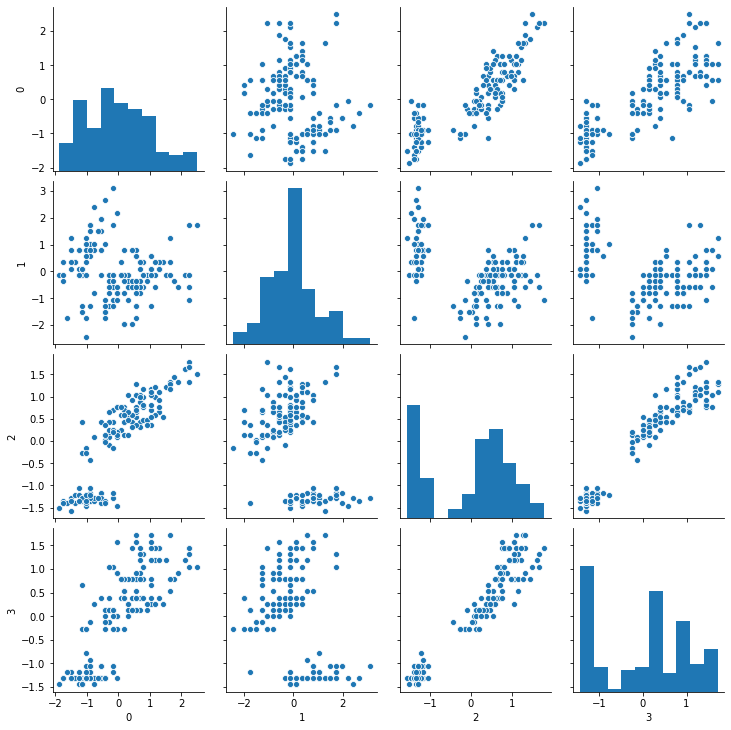

In [54]:
sns.pairplot(pd.DataFrame(SS),diag_kind="hist")

### Training and Testing 

In [25]:
from sklearn.model_selection import train_test_split

In [32]:
validation_size = 0.20 
seed = 7
X_trian,X_test,y_train,y_test = train_test_split(SS,Y,test_size=validation_size)

In [33]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [34]:
logit.fit(X_trian,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
print("accuracy :" , logit.score(X_test,y_test))

accuracy : 0.8666666666666667


In [57]:
logit.predict(X_test)

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica'],
      dtype=object)

In [65]:
mysample = np.array([4.9,3.0,1.4,0.2]).reshape(1,-1)

In [66]:
logit.predict(mysample)

array(['versicolor'], dtype=object)

##### We have Save Model For Features Purpose

In [68]:
import joblib

In [69]:
joblib.dump(logit,"Model/LogisticRegression_iris_dataSet.pkl")

['Model/LogisticRegression_iris_dataSet.pkl']

In [70]:
# Reloding the LogisticRegression Model 
joblib.load("Model/LogisticRegression_iris_dataSet.pkl")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)